In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


In [2]:
data=pd.read_csv('unit4.csv')

In [3]:
data.columns

Index(['STATE', 'PVASTATE', 'DOB', 'MDMAUD', 'RECP3', 'GENDER', 'DOMAIN',
       'INCOME', 'HOMEOWNR', 'HV1', 'HV2', 'HV3', 'HV4', 'IC1', 'IC2', 'IC3',
       'IC4', 'IC5', 'VETERANS', 'NUMPROM', 'CARDPROM', 'CARDPM12', 'NUMPRM12',
       'MAXADATE', 'RFA_2', 'NGIFTALL', 'TIMELAG', 'AVGGIFT'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90569 entries, 0 to 90568
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     90569 non-null  object 
 1   PVASTATE  90569 non-null  object 
 2   DOB       90569 non-null  int64  
 3   MDMAUD    90569 non-null  object 
 4   RECP3     90569 non-null  object 
 5   GENDER    90569 non-null  object 
 6   DOMAIN    90569 non-null  object 
 7   INCOME    70386 non-null  float64
 8   HOMEOWNR  90569 non-null  object 
 9   HV1       90569 non-null  int64  
 10  HV2       90569 non-null  int64  
 11  HV3       90569 non-null  int64  
 12  HV4       90569 non-null  int64  
 13  IC1       90569 non-null  int64  
 14  IC2       90569 non-null  int64  
 15  IC3       90569 non-null  int64  
 16  IC4       90569 non-null  int64  
 17  IC5       90569 non-null  int64  
 18  VETERANS  90569 non-null  object 
 19  NUMPROM   90569 non-null  int64  
 20  CARDPROM  90569 non-null  in

In [5]:
data.duplicated().sum()  #count for duplicates

1

In [6]:
data[data.duplicated(keep=False)] #see duplicates

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,...,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
36109,CA,,4801,XXXX,,F,U1,NaN,,3365,...,,13,5,3,8,9702,L1F,1,NaN,15.0
49464,CA,,4801,XXXX,,F,U1,NaN,,3365,...,,13,5,3,8,9702,L1F,1,NaN,15.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90569 entries, 0 to 90568
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     90569 non-null  object 
 1   PVASTATE  90569 non-null  object 
 2   DOB       90569 non-null  int64  
 3   MDMAUD    90569 non-null  object 
 4   RECP3     90569 non-null  object 
 5   GENDER    90569 non-null  object 
 6   DOMAIN    90569 non-null  object 
 7   INCOME    70386 non-null  float64
 8   HOMEOWNR  90569 non-null  object 
 9   HV1       90569 non-null  int64  
 10  HV2       90569 non-null  int64  
 11  HV3       90569 non-null  int64  
 12  HV4       90569 non-null  int64  
 13  IC1       90569 non-null  int64  
 14  IC2       90569 non-null  int64  
 15  IC3       90569 non-null  int64  
 16  IC4       90569 non-null  int64  
 17  IC5       90569 non-null  int64  
 18  VETERANS  90569 non-null  object 
 19  NUMPROM   90569 non-null  int64  
 20  CARDPROM  90569 non-null  in

In [8]:
data=data.drop_duplicates() #drop duplicates and good place to drop any other obvious nulls or columns

In [9]:
#after removing rows reset index

In [10]:
data.reset_index(drop=True, inplace=True)

### 2.1 split the data into numericals and categoricals for EDA

In [11]:
pd.set_option('display.max_columns', None)  #removes limit (apparently 20) of columns that can be displayed

In [12]:
data.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865


### 2.1 split the data into numericals and categoricals for EDA

In [13]:
d_num=data.select_dtypes(np.number)
d_cat=data.select_dtypes(object)

### 3 numeric columns handling

In [14]:
d_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90568 entries, 0 to 90567
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DOB       90568 non-null  int64  
 1   INCOME    70386 non-null  float64
 2   HV1       90568 non-null  int64  
 3   HV2       90568 non-null  int64  
 4   HV3       90568 non-null  int64  
 5   HV4       90568 non-null  int64  
 6   IC1       90568 non-null  int64  
 7   IC2       90568 non-null  int64  
 8   IC3       90568 non-null  int64  
 9   IC4       90568 non-null  int64  
 10  IC5       90568 non-null  int64  
 11  NUMPROM   90568 non-null  int64  
 12  CARDPROM  90568 non-null  int64  
 13  CARDPM12  90568 non-null  int64  
 14  NUMPRM12  90568 non-null  int64  
 15  MAXADATE  90568 non-null  int64  
 16  NGIFTALL  90568 non-null  int64  
 17  TIMELAG   80916 non-null  float64
 18  AVGGIFT   90568 non-null  float64
dtypes: float64(3), int64(16)
memory usage: 13.1 MB


### 3.1 creat a nulls df which summarises % of nulls per column


In [15]:
nulls=pd.DataFrame(d_num.isna().sum()/len(data)) #work on the numericals first

#eg 3 rows nulls / 4 rows data

In [16]:
nulls.reset_index(inplace=True)

In [17]:
nulls.columns=['column_name','percentage_nulls']
nulls.sort_values(by='percentage_nulls', ascending=False)   
#this is your data quality snapshot

,column_name,percentage_nulls
1,INCOME,0.222838
17,TIMELAG,0.106572
0,DOB,0.000000
10,IC5,0.000000
16,NGIFTALL,0.000000
15,MAXADATE,0.000000
14,NUMPRM12,0.000000
13,CARDPM12,0.000000
12,CARDPROM,0.000000
11,NUMPROM,0.000000


In [18]:
d_num.describe()


,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
count,90568.000000,70386.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,80916.000000,90568.000000
mean,2724.419861,3.878257,1056.365814,1127.396586,4.213387,3.865383,339.368044,386.225897,386.688941,429.972684,15681.854474,46.797578,18.370848,5.343433,12.837404,9701.640602,9.501446,8.114378,13.428568
std,2136.454475,1.855265,936.357737,942.138836,2.302247,2.239625,162.383738,173.076543,160.938606,171.325839,8508.737296,22.944818,8.582028,1.207107,4.499929,5.679915,8.495065,8.310877,10.796408
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,9611.000000,1.000000,0.000000,1.285714
25%,112.000000,2.000000,511.000000,553.000000,3.000000,2.000000,230.000000,273.000000,277.000000,314.000000,10770.000000,27.000000,11.000000,5.000000,11.000000,9702.000000,3.000000,4.000000,8.454545
50%,2610.000000,4.000000,735.000000,800.000000,4.000000,3.000000,309.000000,355.000000,353.000000,396.000000,13692.000000,46.000000,18.000000,6.000000,12.000000,9702.000000,7.000000,6.000000,11.666667
75%,4601.000000,5.000000,1206.000000,1320.000000,5.000000,5.000000,414.000000,464.000000,465.000000,513.000000,18128.000000,64.000000,25.000000,6.000000,13.000000,9702.000000,13.000000,11.000000,15.625000
max,9710.000000,7.000000,6000.000000,6000.000000,13.000000,13.000000,1500.000000,1500.000000,1500.000000,1500.000000,159306.000000,195.000000,61.000000,19.000000,78.000000,9702.000000,237.000000,1088.000000,1000.000000


In [19]:
d_num['INCOME'].unique()

array([nan,  6.,  3.,  1.,  4.,  2.,  7.,  5.])

In [20]:
d_num['INCOME'].value_counts()

5.0    14639
2.0    12482
4.0    12092
1.0     8646
3.0     8135
6.0     7347
7.0     7045
Name: INCOME, dtype: int64

In [21]:
d_num['INCOME'].median()

4.0

In [22]:
d_num['INCOME'].mean()

3.8782570397522234

<AxesSubplot:>

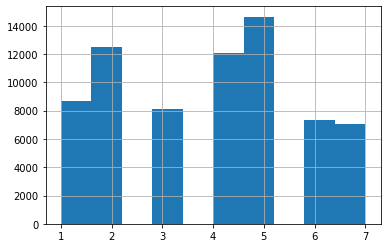

In [23]:
d_num['INCOME'].hist()

In [24]:
d_num.head(10)

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
0,3712,NaN,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,31,4.0,7.741935
1,5202,6.0,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,3,18.0,15.666667
2,0,3.0,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,27,12.0,7.481481
3,2801,1.0,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,16,9.0,6.812500
4,2001,3.0,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,37,14.0,6.864865
5,0,NaN,807,899,3,3,364,410,406,454,15619,35,15,6,12,9702,4,6.0,12.750000
6,6001,4.0,484,519,3,3,251,284,278,311,10717,63,26,4,9,9702,14,4.0,7.642857
7,0,2.0,702,787,3,3,367,457,431,466,14248,35,14,6,12,9702,5,6.0,6.200000
8,0,3.0,234,288,2,1,226,266,280,323,11127,70,29,6,12,9702,11,8.0,18.090909
9,3211,NaN,565,581,3,3,291,329,311,332,10517,28,11,4,9,9702,3,7.0,9.333333


In [25]:
median_d=d_num['INCOME'].fillna(np.median(d_num['INCOME']))

In [26]:
median_d.head(10)

0    NaN
1    6.0
2    3.0
3    1.0
4    3.0
5    NaN
6    4.0
7    2.0
8    3.0
9    NaN
Name: INCOME, dtype: float64

In [27]:
zeros_d=d_num['INCOME'].fillna(0)

In [28]:
zeros_d.head(10)

0    0.0
1    6.0
2    3.0
3    1.0
4    3.0
5    0.0
6    4.0
7    2.0
8    3.0
9    0.0
Name: INCOME, dtype: float64

<AxesSubplot:>

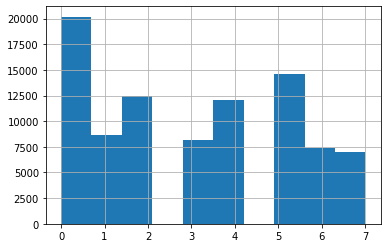

In [29]:
zeros_d.hist()

### 3.2.1 after picking your method apply to your dataframe

In [30]:
d_num['INCOME']=d_num['INCOME'].fillna(0)

In [31]:
import warnings
warnings.filterwarnings('ignore') #this is to ignore the warning message that sian got in her notebook

<AxesSubplot:>

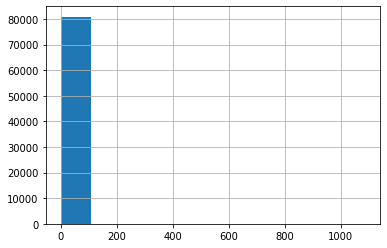

In [32]:
d_num['TIMELAG'].hist()

In [33]:
d_num['TIMELAG'].value_counts()

5.0       8106
4.0       8042
3.0       7995
6.0       6257
2.0       5900
          ... 
61.0         1
55.0         1
58.0         1
62.0         1
1088.0       1
Name: TIMELAG, Length: 67, dtype: int64

In [34]:
d_num['TIMELAG'].unique()

array([4.000e+00, 1.800e+01, 1.200e+01, 9.000e+00, 1.400e+01, 6.000e+00,
       8.000e+00, 7.000e+00,       nan, 3.000e+00, 5.000e+00, 1.000e+00,
       2.300e+01, 1.700e+01, 2.000e+00, 1.600e+01, 1.500e+01, 1.100e+01,
       1.000e+01, 2.000e+01, 0.000e+00, 2.100e+01, 1.300e+01, 1.900e+01,
       2.500e+01, 2.600e+01, 2.800e+01, 3.100e+01, 2.200e+01, 3.500e+01,
       2.700e+01, 3.400e+01, 4.200e+01, 2.900e+01, 3.000e+01, 4.900e+01,
       2.400e+01, 6.200e+01, 3.700e+01, 3.600e+01, 4.400e+01, 4.600e+01,
       3.900e+01, 4.500e+01, 3.800e+01, 3.300e+01, 4.800e+01, 4.700e+01,
       4.300e+01, 4.000e+01, 9.000e+01, 5.600e+01, 3.200e+01, 5.700e+01,
       5.800e+01, 5.900e+01, 4.100e+01, 5.000e+01, 5.100e+01, 5.500e+01,
       6.100e+01, 5.400e+01, 8.900e+01, 1.044e+03, 5.300e+01, 4.420e+02,
       5.200e+01, 1.088e+03])

In [35]:
d_num.describe()

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
count,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,90568.000000,80916.000000,90568.000000
mean,2724.419861,3.014034,1056.365814,1127.396586,4.213387,3.865383,339.368044,386.225897,386.688941,429.972684,15681.854474,46.797578,18.370848,5.343433,12.837404,9701.640602,9.501446,8.114378,13.428568
std,2136.454475,2.297785,936.357737,942.138836,2.302247,2.239625,162.383738,173.076543,160.938606,171.325839,8508.737296,22.944818,8.582028,1.207107,4.499929,5.679915,8.495065,8.310877,10.796408
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,9611.000000,1.000000,0.000000,1.285714
25%,112.000000,1.000000,511.000000,553.000000,3.000000,2.000000,230.000000,273.000000,277.000000,314.000000,10770.000000,27.000000,11.000000,5.000000,11.000000,9702.000000,3.000000,4.000000,8.454545
50%,2610.000000,3.000000,735.000000,800.000000,4.000000,3.000000,309.000000,355.000000,353.000000,396.000000,13692.000000,46.000000,18.000000,6.000000,12.000000,9702.000000,7.000000,6.000000,11.666667
75%,4601.000000,5.000000,1206.000000,1320.000000,5.000000,5.000000,414.000000,464.000000,465.000000,513.000000,18128.000000,64.000000,25.000000,6.000000,13.000000,9702.000000,13.000000,11.000000,15.625000
max,9710.000000,7.000000,6000.000000,6000.000000,13.000000,13.000000,1500.000000,1500.000000,1500.000000,1500.000000,159306.000000,195.000000,61.000000,19.000000,78.000000,9702.000000,237.000000,1088.000000,1000.000000


In [36]:
d_num['TIMELAG'].describe()

count    80916.000000
mean         8.114378
std          8.310877
min          0.000000
25%          4.000000
50%          6.000000
75%         11.000000
max       1088.000000
Name: TIMELAG, dtype: float64

In [37]:
timelag=d_num['TIMELAG']

In [38]:
timelag=timelag[timelag<60]

<AxesSubplot:>

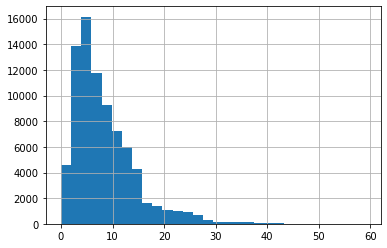

In [39]:
timelag.hist(bins=30)

In [40]:
d_num.columns

Index(['DOB', 'INCOME', 'HV1', 'HV2', 'HV3', 'HV4', 'IC1', 'IC2', 'IC3', 'IC4',
       'IC5', 'NUMPROM', 'CARDPROM', 'CARDPM12', 'NUMPRM12', 'MAXADATE',
       'NGIFTALL', 'TIMELAG', 'AVGGIFT'],
      dtype='object')

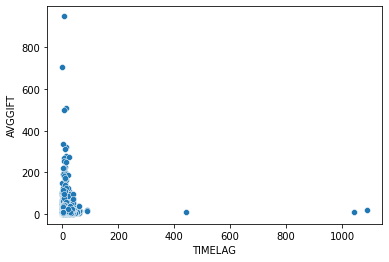

In [41]:
sns.scatterplot(data=d_num, x='TIMELAG', y='AVGGIFT');

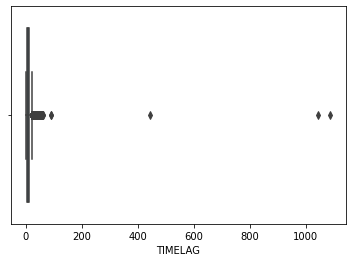

In [42]:
sns.boxplot(d_num['TIMELAG']);

### removing outliers then scatter plot again
- IQR
- upper_limit
- exclide anything over upper limit
- OR FILTER BY A FIXED LIMIT

### pd.cut or pd.qcut
### or create function to bucket

## 3.3 Correlation 
- correlation matrix (with or without mask, consider colours)
- joint plot
- pair plot
- scatter plot
- box plot

In [43]:
d_cat.columns

Index(['STATE', 'PVASTATE', 'MDMAUD', 'RECP3', 'GENDER', 'DOMAIN', 'HOMEOWNR',
       'VETERANS', 'RFA_2'],
      dtype='object')

In [44]:
d_cat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90568 entries, 0 to 90567
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STATE     90568 non-null  object
 1   PVASTATE  90568 non-null  object
 2   MDMAUD    90568 non-null  object
 3   RECP3     90568 non-null  object
 4   GENDER    90568 non-null  object
 5   DOMAIN    90568 non-null  object
 6   HOMEOWNR  90568 non-null  object
 7   VETERANS  90568 non-null  object
 8   RFA_2     90568 non-null  object
dtypes: object(9)
memory usage: 6.2+ MB


# 4.01 common things to check
- blanks and nulls and any other weird value
- relevance - from the cat to the target
   - chi squared 
- cardinality (how mnany diff values are in that column, are there some small ones which can be grouped

In [45]:
d_cat['MDMAUD'].unique() #checking for cardinality with unique

array(['XXXX', 'C1CM', 'D1CM', 'L1CM', 'C2CM', 'D2CM', 'I1CM', 'I2MM',
       'I1LM', 'L2CM', 'C1MM', 'C1LM', 'D5CM', 'I2CM', 'D5TM', 'L1LM',
       'D5MM', 'C2MM', 'I5CM', 'C5CM', 'I5MM', 'C2LM', 'C5MM', 'D2MM',
       'L1MM', 'C5TM', 'L2TM'], dtype=object)

In [46]:
d_cat['MDMAUD'].value_counts() #MDMAUD - Major donor matrix index - we are not sure what it is, 
#we decide waht to do with this column. so lets look at everythin but MDMAUD

XXXX    90289
C1CM       59
L1CM       44
I1CM       34
D2CM       27
C2CM       23
D1CM       19
L2CM       14
C1LM        8
L1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
I1LM        3
D5TM        3
C2MM        3
C5CM        3
C2LM        2
C1MM        1
I2MM        1
I5CM        1
I5MM        1
C5MM        1
L1MM        1
C5TM        1
L2TM        1
Name: MDMAUD, dtype: int64

In [47]:
d_cat[d_cat.MDMAUD!='XXXX'] #filtering for not MDMAUD

,STATE,PVASTATE,MDMAUD,RECP3,GENDER,DOMAIN,HOMEOWNR,VETERANS,RFA_2
101,FL,,C1CM,,M,S2,H,,L1G
353,TX,,D1CM,,M,T2,H,,L1G
453,GA,,L1CM,,M,S2,H,,L1G
505,MO,,C2CM,,F,R3,U,,L2G
581,FL,,D2CM,,F,S2,,,L1G
...,...,...,...,...,...,...,...,...,...
89171,TX,,L1CM,,F,U1,H,,L1G
90058,SC,,C1CM,,M,C1,H,,L3G
90507,CA,,D2MM,,F,C2,H,,L1G
90555,CA,,L2CM,,A,S1,H,,L3G


In [48]:
major=data[(data.MDMAUD !='XXXX')] 

In [49]:
major.describe()

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
count,279.000000,211.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,277.000000,279.000000
mean,2284.824373,4.620853,1560.057348,1659.580645,5.243728,4.799283,419.763441,475.767025,470.770609,522.548387,20949.831541,89.534050,24.068100,6.146953,28.351254,9701.673835,15.236559,8.083032,76.561089
std,1830.291615,1.990057,1308.499175,1301.707619,2.790932,2.623058,234.541067,254.266245,218.951568,231.667766,13169.703884,30.273776,8.152703,1.230568,7.382065,5.448027,16.941328,7.267929,81.977787
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,6.000000,1.000000,6.000000,9611.000000,1.000000,0.000000,8.904762
25%,653.500000,3.000000,677.500000,717.000000,3.000000,3.000000,258.500000,300.500000,314.500000,358.500000,13060.500000,68.000000,18.000000,6.000000,25.000000,9702.000000,7.000000,4.000000,42.635088
50%,2201.000000,5.000000,1125.000000,1235.000000,5.000000,4.000000,358.000000,426.000000,426.000000,487.000000,17408.000000,94.000000,25.000000,6.000000,29.000000,9702.000000,11.000000,6.000000,61.111111
75%,3651.500000,6.000000,1929.500000,2144.500000,6.000000,6.000000,513.000000,558.000000,572.500000,618.000000,24688.000000,113.000000,30.000000,6.000000,33.000000,9702.000000,19.000000,10.000000,87.875000
max,6604.000000,7.000000,5916.000000,5800.000000,13.000000,13.000000,1287.000000,1500.000000,1130.000000,1246.000000,88847.000000,158.000000,41.000000,12.000000,50.000000,9702.000000,237.000000,40.000000,948.500000


In [50]:
d_num['AVGGIFT'].mean()  #here we look at the mean of average gift, when we compare this to the average gift 
#by those XXXX we see the average gift is a lot higher than the avergage 

13.428568110050856

In [51]:
#make a function to label those 'major donor' and 'not major donor'
#convert rating to 1 0 

def grp_mdmaud(x):
    if x == 'XXXX':
        return 'not_major_donor'
    else:
        return 'major_donor'
d_cat['MDMAUD']=list(map(grp_mdmaud,d_cat['MDMAUD']))

In [53]:
grp_mdmaud('MDMAUD')

'major_donor'

In [55]:
d_cat['STATE']

0        IL
1        CA
2        NC
3        CA
4        FL
         ..
90563    FL
90564    AK
90565    TX
90566    MI
90567    NC
Name: STATE, Length: 90568, dtype: object

### how to establish relevance 
- box plot, cat plot with jitter, map (in tableau or python)
- groupby state with mean, media

In [60]:
geo = data[['STATE', 'AVGGIFT']]

In [62]:
geo.to_csv('stateavggift.csv')

In [63]:
grouping=data.groupby('STATE').agg({'AVGGIFT': [np.mean, np.median, 'count']})

In [64]:
grouping.columns=['mean','median','count']

In [65]:
grouping.sort_values(by='mean', ascending=False)

,mean,median,count
STATE,,,
AS,30.000000,30.000000,1
VT,22.100168,17.944444,6
DC,20.000000,20.000000,1
DE,17.300000,11.833333,3
AK,17.261347,15.000000,275
VA,16.830475,12.607143,54
CT,15.738928,11.550000,20
HI,15.479504,13.750000,423
CA,14.683392,12.531250,16283


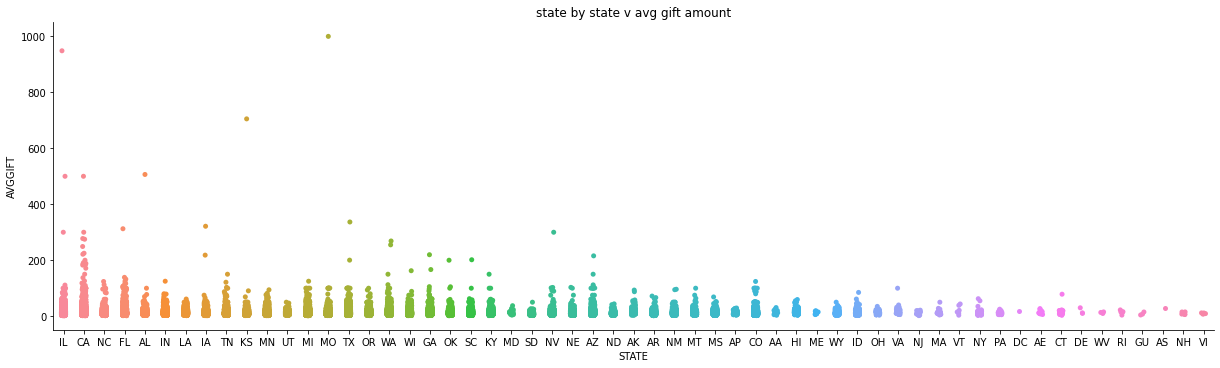

In [66]:
ax=sns.catplot(data=data, x='STATE', y='AVGGIFT').set(title='state by state v avg gift amount')
ax.fig.set_figwidth(20)

In [67]:
#state looks to just add noise perhaps it doesnt really matter

## 4.1 chi squared test
- looking for correlation between categories
- create a crosstab between the columns
- run the test 
- evaluate the results 

In [69]:
from scipy.stats import chi2_contingency

In [70]:
d_cat.columns

Index(['STATE', 'PVASTATE', 'MDMAUD', 'RECP3', 'GENDER', 'DOMAIN', 'HOMEOWNR',
       'VETERANS', 'RFA_2'],
      dtype='object')

In [73]:
data_crosstab=pd.crosstab(d_cat['HOMEOWNR'], d_cat ['RFA_2'], margins = False)

In [74]:
data_crosstab

RFA_2,L1E,L1F,L1G,L2E,L2F,L2G,L3D,L3E,L3F,L3G,L4D,L4E,L4F,L4G
HOMEOWNR,,,,,,,,,,,,,,
,1009,6727,2882,1010,2351,1087,508,1615,759,354,1079,894,534,241
H,2522,16179,6771,2596,5800,2413,1184,3970,1838,776,2276,1901,980,440
U,1136,6300,2354,1075,2247,910,575,1659,755,295,1094,852,437,183


In [75]:
chi2_contingency(data_crosstab, correction=False)

(175.3605988661588,
 4.1538789000941835e-24,
 26,
 array([[ 1084.71369579,  6788.11831994,  2790.6915246 ,  1087.96760445,
          2416.72445014,  1024.98122957,   526.90078173,  1683.66531225,
           779.07870329,   331.20141772,  1034.04568943,   847.64320731,
           453.45541472,   200.81264906],
        [ 2558.27535112, 16009.6400053 ,  6581.78961664,  2565.94962901,
          5699.79582192,  2417.39753555,  1242.68485558,  3970.8906457 ,
          1837.4413921 ,   781.13185673,  2438.77588111,  1999.14939051,
          1069.46544033,   473.61257839],
        [ 1024.0109531 ,  6408.24167476,  2634.51885876,  1027.08276654,
          2281.47972794,   967.62123487,   497.41436269,  1589.44404205,
           735.4799046 ,   312.66672555,   976.17842947,   800.20740217,
           428.07914495,   189.57477255]]))

In [ ]:
#tis returns 4 results in this order:
#(chu-square statistic,
#p value, 
#degrees of freedom,
#expected )

In [ ]:
#chi number is 175 and our degrees of freedom is 26, so if we look on chi square probabilty table we see our chi
#value is much higher than the numbers on the table along the row of our degree of freedom so it means that there is 
#correlation